<a href="https://colab.research.google.com/github/mozzaquatro/financial_market/blob/main/03_Calculando_CORRELA%C3%87%C3%83O_entre_D%C3%93LAR_e_IBOVESPA_%7C_IBOVESPA_DOLARIZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 6.3 MB 11.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

2. Obtendo e tratando os dados

In [3]:
tickers = ["^BVSP","USDBRL=X"]
carteira = web.get_data_yahoo(tickers,start="2007-01-01")["Close"]

[*********************100%***********************]  2 of 2 completed


In [4]:
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-01,2.1325,NaN
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
...,...,...
2021-11-09,5.5431,105535.000000
2021-11-10,5.4791,105968.000000
2021-11-11,5.4899,107725.000000


In [5]:
carteira = carteira.dropna()
carteira

,USDBRL=X,^BVSP
Date,,
2007-01-02,2.1310,45383.000000
2007-01-03,2.1345,44445.000000
2007-01-04,2.1390,44020.000000
2007-01-05,2.1470,42245.000000
2007-01-08,2.1465,42830.000000
...,...,...
2021-11-08,5.5411,104781.000000
2021-11-09,5.5431,105535.000000
2021-11-10,5.4791,105968.000000


3. Resultados

In [6]:
carteira.columns = ["Dolar", "Ibov"]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc43dad0810>,
      dtype=object)

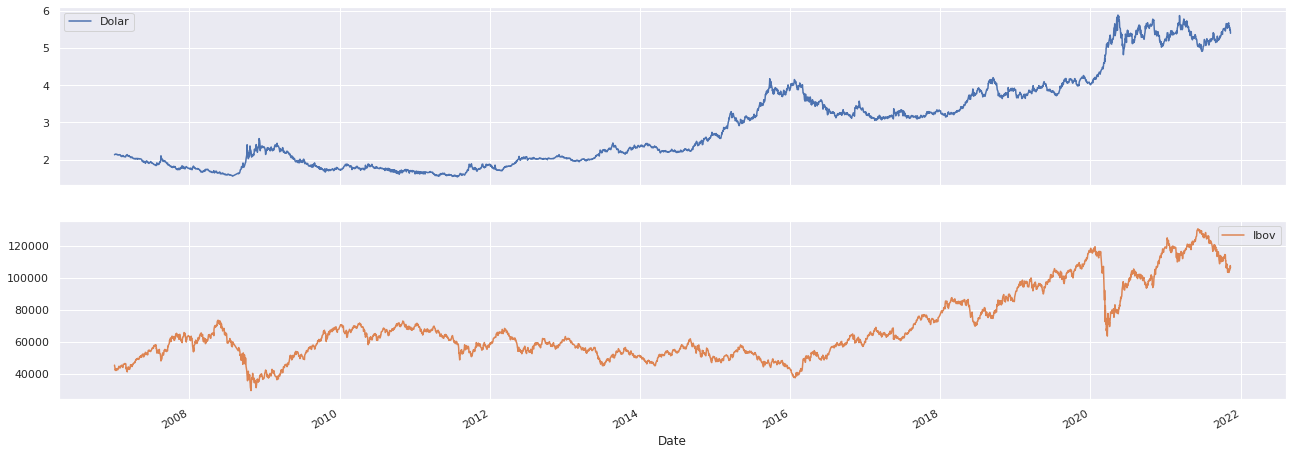

In [7]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))

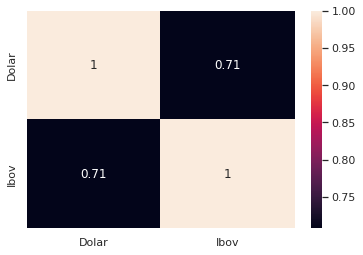

In [8]:
sns.heatmap(carteira.corr(),annot=True)

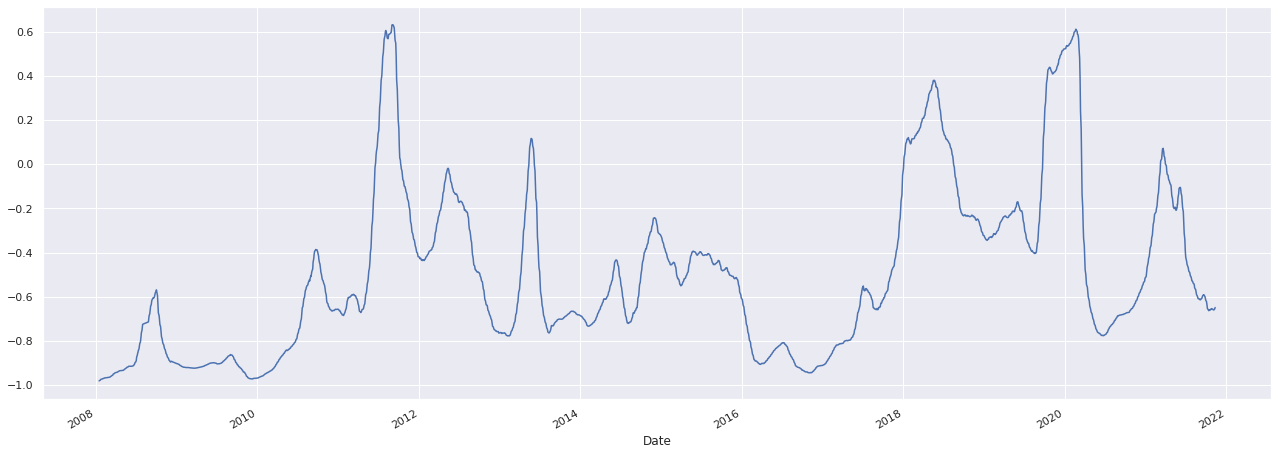

In [9]:
carteira["Dolar"].rolling(252).corr(carteira["Ibov"]).plot(figsize=(22,8))

In [10]:
carteira["Ibov_Dolarizado"] = (carteira["Ibov"]/carteira["Dolar"])
carteira      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Dolar,Ibov,Ibov_Dolarizado
Date,,,
2007-01-02,2.1310,45383.000000,21296.573959
2007-01-03,2.1345,44445.000000,20822.206345
2007-01-04,2.1390,44020.000000,20579.710732
2007-01-05,2.1470,42245.000000,19676.291819
2007-01-08,2.1465,42830.000000,19953.411504
...,...,...,...
2021-11-08,5.5411,104781.000000,18909.783170
2021-11-09,5.5431,105535.000000,19038.985817
2021-11-10,5.4791,105968.000000,19340.401818


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc416364950>,
      dtype=object)

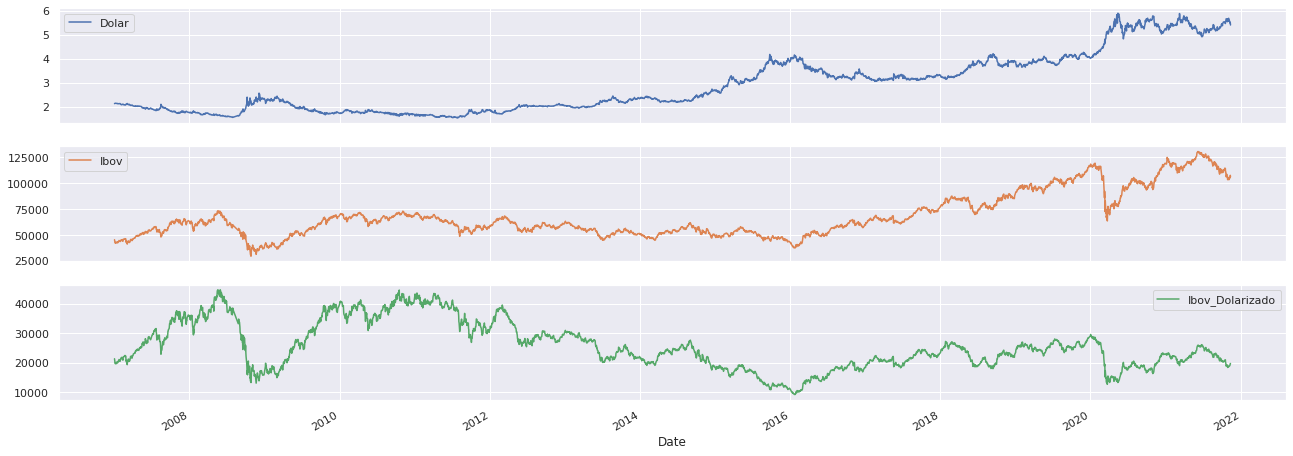

In [11]:
sns.set()
carteira.plot(subplots=True, figsize=(22,8))